In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r'G:\DATASETS\Analytics Vidya\BANK\train.csv')
test_data = pd.read_csv(r'G:\DATASETS\Analytics Vidya\BANK\test.csv')
train_data.drop('Loan_ID',axis=1 ,inplace=True)
ID = test_data['Loan_ID']
test_data.drop('Loan_ID',axis=1 ,inplace=True)

In [3]:
train_data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
#train_data.describe()

In [5]:
missing_columns = train_data.columns[train_data.isna().sum() >1]
missing_columns

Index(['Length_Employed', 'Home_Owner', 'Annual_Income',
       'Months_Since_Deliquency'],
      dtype='object')

In [6]:
train_data.Length_Employed.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [7]:
train_data.Length_Employed.unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [8]:
test_data.Length_Employed.fillna(train_data.Length_Employed.mode()[0],inplace=True)
train_data.Length_Employed.fillna(train_data.Length_Employed.mode()[0],inplace=True)

In [9]:
len(train_data)

164309

In [10]:
train_data.isna().sum()

Loan_Amount_Requested          0
Length_Employed                0
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [11]:
88379*100/164309

53.788289138148244

In [12]:
25349*100/164309

15.42763938676518

In [13]:
train_data.Home_Owner.value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [14]:
test_data.Home_Owner.fillna(train_data.Home_Owner.mode()[0],inplace=True)
train_data.Home_Owner.fillna(train_data.Home_Owner.mode()[0],inplace=True)

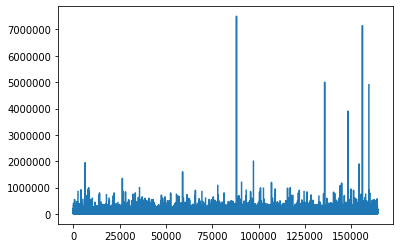

In [15]:
train_data.Annual_Income.plot()

In [16]:
train_data.Annual_Income.mean()

73331.15943386468

In [17]:
train_data.Annual_Income.median()

63000.0

In [18]:
test_data.Annual_Income.fillna(train_data.Annual_Income.median(),inplace=True)
train_data.Annual_Income.fillna(train_data.Annual_Income.median(),inplace=True)

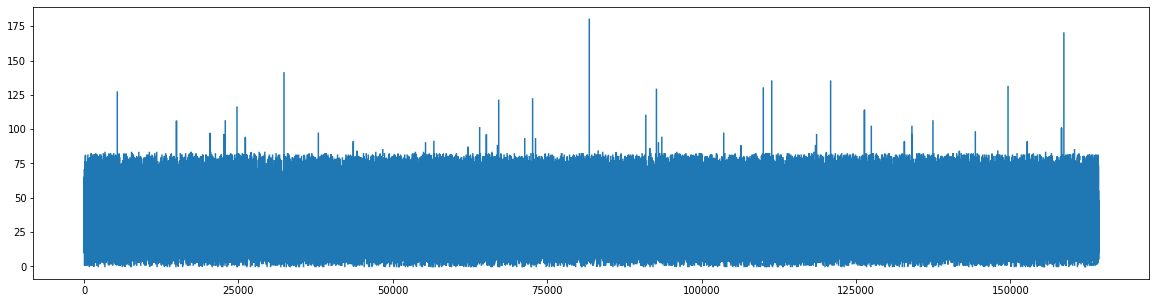

In [19]:
train_data.Months_Since_Deliquency.plot(figsize=(20,5))

In [20]:
train_data.Months_Since_Deliquency.mean()  

34.22935598577637

In [21]:
train_data.Months_Since_Deliquency.median()  

31.0

In [22]:
test_data.Months_Since_Deliquency.fillna(train_data.Months_Since_Deliquency.mean(),inplace=True)
train_data.Months_Since_Deliquency.fillna(train_data.Months_Since_Deliquency.mean(),inplace=True)

In [27]:
test_data.isna().sum()

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

In [28]:
import re
train_data['Loan_Amount_Requested']=train_data.Loan_Amount_Requested.apply(lambda x:int(re.sub(r',','',x)))
test_data['Loan_Amount_Requested']=test_data.Loan_Amount_Requested.apply(lambda x:int(re.sub(r',','',x)))

In [29]:
numeric_columns = [col for col in train_data.columns if train_data[col].dtype in ['float','int64'] ]
category_columns = [col for col in train_data.columns if train_data[col].dtype =='O' ]

In [30]:
train_data[numeric_columns].head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,7000,68000.0,18.37,0,34.229356,9,14,1
1,30000,63000.0,14.93,0,17.000000,12,24,3
2,24725,75566.4,15.88,0,34.229356,12,16,3
3,16000,56160.0,14.34,3,34.229356,16,22,3
4,17000,96000.0,22.17,1,34.229356,19,30,1


In [31]:
train_data.Inquiries_Last_6Mo.unique()

array([0, 3, 1, 2, 4, 5, 6, 7, 8], dtype=int64)

In [32]:
train_data[category_columns].head()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,< 1 year,Rent,not verified,car,Female
1,4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,< 1 year,Mortgage,VERIFIED - income source,debt_consolidation,Male
4,8 years,Own,VERIFIED - income source,debt_consolidation,Female


In [33]:
#test_data.Purpose_Of_Loan.value_counts()

In [34]:
train_data.Length_Employed.unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', '6 years', '9 years', '3 years', '5 years'],
      dtype=object)

In [35]:
def Clean(text):
    if text[0] == '<':
        text = re.sub('\D+','',text)
        text = int(text)-1
    else:
        text = int(re.sub('\D+','',text))
    return text

In [36]:
train_data.Length_Employed =  train_data.Length_Employed.apply(lambda x:Clean(x))
test_data.Length_Employed =  test_data.Length_Employed.apply(lambda x:Clean(x))
train_data.Length_Employed.unique()

array([ 0,  4,  7,  8,  2, 10,  1,  6,  9,  3,  5], dtype=int64)

In [37]:
dummy_columns = ['Home_Owner','Income_Verified','Purpose_Of_Loan','Gender']

In [38]:
train_dummi = pd.get_dummies(train_data,columns=dummy_columns,drop_first=True)
test_dummi = pd.get_dummies(test_data,columns=dummy_columns,drop_first=True)

In [39]:
train_dummi.shape,test_dummi.shape

((164309, 29), (109541, 28))

In [40]:
train_dummi.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Home_Owner_None,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,7000,0,68000.0,18.37,0,34.229356,9,14,1,0,...,0,0,0,0,0,0,0,0,0,0
1,30000,4,63000.0,14.93,0,17.000000,12,24,3,0,...,0,0,0,0,0,0,0,0,0,0
2,24725,7,75566.4,15.88,0,34.229356,12,16,3,0,...,0,0,0,0,0,0,0,0,0,1
3,16000,0,56160.0,14.34,3,34.229356,16,22,3,0,...,0,0,0,0,0,0,0,0,0,1
4,17000,8,96000.0,22.17,1,34.229356,19,30,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split,cross_validate,RandomizedSearchCV,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,SGDClassifier,RidgeClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [42]:
X = train_dummi.drop('Interest_Rate',axis=1)
y= train_dummi['Interest_Rate']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [43]:
RFC_d = RandomForestClassifier()
RFC_d.fit(X_train,y_train)
pred_ref = RFC_d.predict(X_test)
print(accuracy_score(y_test,pred_ref))
print(classification_report(y_test,pred_ref))

0.5162617459467355
              precision    recall  f1-score   support

           1       0.49      0.25      0.34      8452
           2       0.49      0.61      0.54     17645
           3       0.56      0.55      0.56     14981

    accuracy                           0.52     41078
   macro avg       0.51      0.47      0.48     41078
weighted avg       0.52      0.52      0.51     41078



In [44]:
adc_d = AdaBoostClassifier()
adc_d.fit(X_train,y_train)
pred_abc = adc_d.predict(X_test)
print(accuracy_score(y_test,pred_abc))
print(classification_report(y_test,pred_abc))

0.5276060178197576
              precision    recall  f1-score   support

           1       0.54      0.22      0.32      8452
           2       0.49      0.65      0.56     17645
           3       0.58      0.55      0.57     14981

    accuracy                           0.53     41078
   macro avg       0.54      0.48      0.48     41078
weighted avg       0.53      0.53      0.51     41078



In [45]:
f1_score(y_test,pred_abc,average='weighted')

0.5129775608066761

In [46]:
GBC_d = GradientBoostingClassifier()
GBC_d.fit(X_train,y_train)
pred_gbc = GBC_d.predict(X_test)
print(accuracy_score(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

0.5312089196163396
              precision    recall  f1-score   support

           1       0.56      0.19      0.29      8452
           2       0.50      0.66      0.57     17645
           3       0.58      0.57      0.58     14981

    accuracy                           0.53     41078
   macro avg       0.55      0.47      0.48     41078
weighted avg       0.54      0.53      0.51     41078



In [47]:
f1_score(y_test,pred_gbc,average='weighted')

0.5123290831301234

### scaling

In [48]:
scale_std = StandardScaler()
X_train_std = scale_std.fit_transform(X_train)
X_test_std = scale_std.transform(X_test)

In [49]:
RFC_std = RandomForestClassifier()
RFC_std.fit(X_train_std,y_train)
pred_rfcstd = RFC_std.predict(X_test_std)

print(f1_score(y_test,pred_rfcstd,average='weighted'))

0.5054574115934642


In [50]:
ABC_std = AdaBoostClassifier()
ABC_std.fit(X_train_std,y_train)
pred_abcstd = ABC_std.predict(X_test_std)
print(f1_score(y_test,pred_abcstd,average='weighted'))

0.5129775608066761


In [51]:
GBC_std = GradientBoostingClassifier()
GBC_std.fit(X_train_std,y_train)
pred_gbcstd = GBC_std.predict(X_test_std)
print(f1_score(y_test,pred_gbcstd,average='weighted'))

0.5123290831301234


In [69]:
scale_min = MinMaxScaler()
X_train_min = scale_min.fit_transform(X_train)
X_test_min = scale_min.transform(X_test)

In [70]:
RFC_min = RandomForestClassifier()
RFC_min.fit(X_train_min,y_train)
pred_rfcmin = RFC_min.predict(X_test_min)

print(f1_score(y_test,pred_rfcmin,average='weighted'))

0.5026650317530283


In [71]:
ABC_min = AdaBoostClassifier()
ABC_min.fit(X_train_min,y_train)
pred_abcmin = ABC_min.predict(X_test_min)
print(f1_score(y_test,pred_abcmin,average='weighted'))

0.5129775608066761


In [72]:
GBC_min = GradientBoostingClassifier()
GBC_min.fit(X_train_min,y_train)
pred_gbcmin = GBC_min.predict(X_test_min)
print(f1_score(y_test,pred_gbcmin,average='weighted'))

0.512174910319509


In [56]:
from statistics import mode

In [57]:
import xgboost

In [58]:
clf = xgboost.XGBClassifier()

In [59]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
pred_xgd = clf.predict(X_test)

In [61]:
f1_score(y_test,pred_xgd,average='weighted')

0.5310737867763076

In [62]:
pred_xg_td = clf.predict(test_dummi)

In [63]:
dataframe = pd.DataFrame({'Loan_ID':ID,'Interest_Rate':pred_xg_td})
dataframe.to_csv('submission_xgboost.csv',index=False)

In [64]:
clf.fit(X_train_min,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
pred_xgmin = clf.predict(X_test_min)
f1_score(y_test,pred_xgmin,average='weighted')

0.5310503673399336

In [73]:
test_min = scale_min.transform(test_dummi)
pred_xg_min = clf.predict(test_min)

In [74]:
clf.fit(X_train_std,y_train)
pred_xgstd = clf.predict(X_test_std)
f1_score(y_test,pred_xgstd,average='weighted')

0.5310503673399336

In [76]:
test_std = scale_std.transform(test_dummi)
pred_xg_std = clf.predict(test_std)

In [78]:
cross_validate(xgboost.XGBClassifier(),X=X_train_min,y=y_train,cv=10)

{'fit_time': array([171.65858841, 181.73791575, 190.68083191, 191.03596544,
        231.18242073, 188.51259995, 192.39516616, 208.31320286,
        184.76007581, 202.15530252]),
 'score_time': array([0.59984875, 0.55586529, 0.55586123, 0.57185793, 0.55586052,
        0.51187277, 0.56067896, 0.5681088 , 0.54468703, 0.62663889]),
 'test_score': array([0.54673807, 0.5328248 , 0.53801834, 0.54061511, 0.53858638,
        0.53185101, 0.54524061, 0.5414266 , 0.54061511, 0.54564635])}

In [147]:
kf  = KFold(n_splits=10)
scores = []
pred_test = []
model = xgboost.XGBClassifier()
for train_index ,test_index in kf.split(X):
    #print('Train index:',train_index,'Cross_validation index:',test_index)
    X_train_cv = X.iloc[train_index]
    X_test_cv = X.iloc[test_index]
    
    y_train_cv = y.iloc[train_index]
    y_test_cv = y.iloc[test_index]
    
    model.fit(X_train_cv,y_train_cv)
    
    pred = model.predict(X_test_cv)
    
    scores.append(f1_score(y_test_cv,pred,average='weighted'))
    
    test_predictions = model.predict(test_dummi)
    pred_test.append(test_predictions)

In [150]:
scores.index(max(scores))

7

In [153]:
scores

[0.5269554363085415,
 0.53049683574206,
 0.5331481470269394,
 0.530116068032515,
 0.5368064694846226,
 0.5352250301511157,
 0.5309300305773964,
 0.539432882375764,
 0.527984794163073,
 0.5339846083519497]

In [155]:
from scipy.stats import mode
pred1 = mode(pred_test,0)

In [145]:
len(pred1.mode[0])

109541

In [149]:
pred_test[4]

array([2, 2, 3, ..., 2, 3, 2], dtype=int64)

In [156]:
dataframe = pd.DataFrame({'Loan_ID':ID,'Interest_Rate':pred1.mode[0]})
dataframe.to_csv('submission_cv10.csv',index=False)